In [2]:
import os
import numpy as np
import torch
import clip
from tqdm.notebook import tqdm

In [3]:
print("Torch Verion:", torch.__version__)

Torch Verion: 1.7.1+cu110


In [4]:
clip.available_models()

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'ViT-B/32', 'ViT-B/16']

In [21]:
model, preprocess = clip.load("ViT-B/16")

In [7]:
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
from collections import OrderedDict

In [8]:
%matplotlib inline

In [11]:
image1 = Image.open("/home/jlew/git/CLIP/gs_sample/almondmilk/IMG_0010.jpeg")
image2 = Image.open("/home/jlew/git/CLIP/gs_sample/almondmilk/IMG_0011.jpeg")

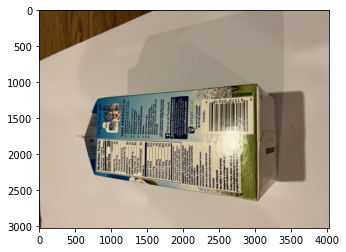

In [12]:
plt.imshow(image1)

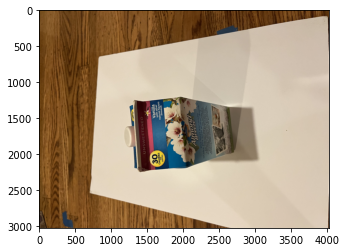

In [13]:
plt.imshow(image2)

In [24]:
image_input1 = torch.tensor(np.stack([preprocess(image1)])).cuda()
image_input2 = torch.tensor(np.stack([preprocess(image2)])).cuda()

In [25]:
with torch.no_grad():
    image_feature1 = model.encode_image(image_input1).float()
    image_feature2 = model.encode_image(image_input2).float()

In [34]:
def clip_similarity(image_feature1, image_feature2):
    image_feature1 /= image_feature1.norm(dim=-1, keepdim=True)
    image_feature2 /= image_feature2.norm(dim=-1, keepdim=True)
    similarity = image_feature1.cpu().numpy() @ image_feature2.cpu().numpy().T
    return similarity

In [35]:
clip_similarity(image_feature1, image_feature2)

array([[0.8334519]], dtype=float32)

In [36]:
clip_similarity(image_feature1, image_feature1)

array([[1.]], dtype=float32)